In [291]:
import pandas as pd
import sys
import os
scripts_path = "../scripts"
sys.path.append(scripts_path)


In [292]:

import importlib
import time_analysisss
importlib.reload(time_analysisss)

from time_analysisss import load_data

df = load_data("../data/raw/EW-time table for Upward.csv")



In [293]:
import sys
sys.path.append('../scripts')  # adjust if needed

import importlib
import passenger_flow_utils
importlib.reload(passenger_flow_utils)

from passenger_flow_utils import basic_checks


 Basic Checks on Raw Data

In [294]:
basic_checks(df)

--- Shape ---
(46, 69)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Stations        46 non-null     object
 1   Stations -code  46 non-null     object
 2   Train times     46 non-null     object
 3   10102           46 non-null     object
 4   10202           46 non-null     object
 5   10302           46 non-null     object
 6   10402           46 non-null     object
 7   10502           46 non-null     object
 8   10602           46 non-null     object
 9   10702           46 non-null     object
 10  10802           46 non-null     object
 11  10104           46 non-null     object
 12  10204           46 non-null     object
 13  10304           46 non-null     object
 14  10404           46 non-null     object
 15  10504           46 non-null     object
 16  10604           46 non-null     object
 17  10704           46 

In [295]:
# print only null values in the df
print("Null values in the DataFrame:")
print(df.isnull().sum())    

Null values in the DataFrame:
Stations          0
Stations -code    0
Train times       0
10102             0
10202             0
                 ..
10716             0
10118             0
10218             0
10318             0
10518             0
Length: 69, dtype: int64


# Drop Columns with High NaN Percentage
Columns with a high proportion of missing values (more than 75%) are removed from the DataFrame using the drop_high_nan_columns function.

In [296]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import drop_high_nan_columns

df = drop_high_nan_columns(df, threshold=0.75)


Dropping columns with > 75.0% NaNs: []


# Rename Columns
Columns are renamed for better readability and easier data manipulation in subsequent steps.

In [297]:
# raname columns for better readability
df = df.rename(columns={'Stations -code': 'station_id'})
df = df.rename(columns={'Train times': 'arrival_departure'})
df = df.rename(columns={'Stations ': 'Stations'})



# Reshape Data from Wide to Long Format
The melt_and_pivot_train_schedule function is used to transform the DataFrame from a wide format, where each train has its own set of columns, to a long format that is more suitable for time-series analysis. (46 TO 1716)

In [298]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import melt_and_pivot_train_schedule

df_pivot = melt_and_pivot_train_schedule(df)


c:\Users\nebiy\OneDrive\Documents\code\Train-Passenger-Flow-Analysis\notebooks\../scripts\time_analysisss.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pivot['Arrival'] = pd.to_datetime(df_pivot['Arrival'], errors='coerce')
c:\Users\nebiy\OneDrive\Documents\code\Train-Passenger-Flow-Analysis\notebooks\../scripts\time_analysisss.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pivot['Departure'] = pd.to_datetime(df_pivot['Departure'], errors='coerce')


# Perform Basic Checks on Pivoted Data
Found some null values when melting the data

In [299]:
basic_checks(df_pivot)

--- Shape ---
(1716, 5)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Stations    1716 non-null   object        
 1   station_id  1716 non-null   object        
 2   train_id    1716 non-null   object        
 3   Arrival     1518 non-null   datetime64[ns]
 4   Departure   1452 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 67.2+ KB

--- Null Values ---
arrival_departure
Stations        0
station_id      0
train_id        0
Arrival       198
Departure     264
dtype: int64

--- Descriptive Statistics ---
arrival_departure                        Arrival  \
count                                       1518   
mean               2025-08-05 13:58:22.239789056   
min                          2025-08-05 00:09:39   
25%                2025-08-05 10:00:19.750000128   
50%                   2025

# Fill Missing Time Data
The fill_missing_times_with_station_avg function is used to fill in any null values in the 'Arrival' and 'Departure' columns, likely using the average times for each respective station.
   THERE WERE NULLS ON Arrival(198) AND Departure(264)

In [300]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import fill_missing_times_with_station_avg

df_pivot = fill_missing_times_with_station_avg(df_pivot)


In [301]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import calculate_dwell_time
df_pivot = calculate_dwell_time(df_pivot)


#  Perform Basic Checks on Processed Data
The basic_checks function is run on the fully processed DataFrame to provide a final overview of its characteristics.

In [302]:
basic_checks(df_pivot)

--- Shape ---
(1716, 6)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   Stations    1716 non-null   object         
 1   station_id  1716 non-null   object         
 2   train_id    1716 non-null   object         
 3   Arrival     1716 non-null   datetime64[ns] 
 4   Departure   1716 non-null   datetime64[ns] 
 5   Dwell Time  1716 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), object(3), timedelta64[ns](1)
memory usage: 80.6+ KB

--- Null Values ---
arrival_departure
Stations      0
station_id    0
train_id      0
Arrival       0
Departure     0
Dwell Time    0
dtype: int64

--- Descriptive Statistics ---
arrival_departure                        Arrival  \
count                                       1716   
mean               2025-08-05 13:13:10.959480320   
min                          2025-08-05 00:09:39

In [303]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import check_null
check_null(df_pivot)

arrival_departure
Stations      0.0
station_id    0.0
train_id      0.0
Arrival       0.0
Departure     0.0
Dwell Time    0.0
dtype: float64


#  Compute Station Arrival Gap Statistics
The compute_station_gap_stats function is used to calculate statistics on the time difference between train arrivals at each station.

In [304]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import compute_station_gap_stats

station_stats = compute_station_gap_stats(df_pivot)

Computed station gap stats:
                Stations    Avg_Gap    Min_Gap     Max_Gap    Gap_Std
1            Ayat T10140   4.909604   0.000000   15.000000   6.548091
25     Torhailoch T12202   6.274227   0.000000   15.000000   7.305804
24     Torhailoch T12201   6.445167   0.000000  382.402525  47.431134
14             Megenagna   6.944889   0.000000   15.000000   7.226202
2            Ayat T10141   7.466014   0.000000   14.000000   5.789348
10           Hayahulet 3   9.676224   0.000000  174.783333  22.061010
9            Hayahulet 2  10.649223   0.000000  235.200000  29.234475
6           Gurd Shala 1  14.738462   0.900000   23.000000   3.535049
13  Management Institute  14.738462   2.616667   23.000000   3.509176
11                Leghar  14.738462   0.616667   23.000000   3.666051
7           Gurd Shala 2  14.738462   1.683333   23.000000   3.604511
20             St.Michel  14.738462   0.500000   23.000000   3.730413
17       Service College  14.738462   0.900000   23.000000   3

 # visualization
 plot the average gap with error bars for standard deviation:

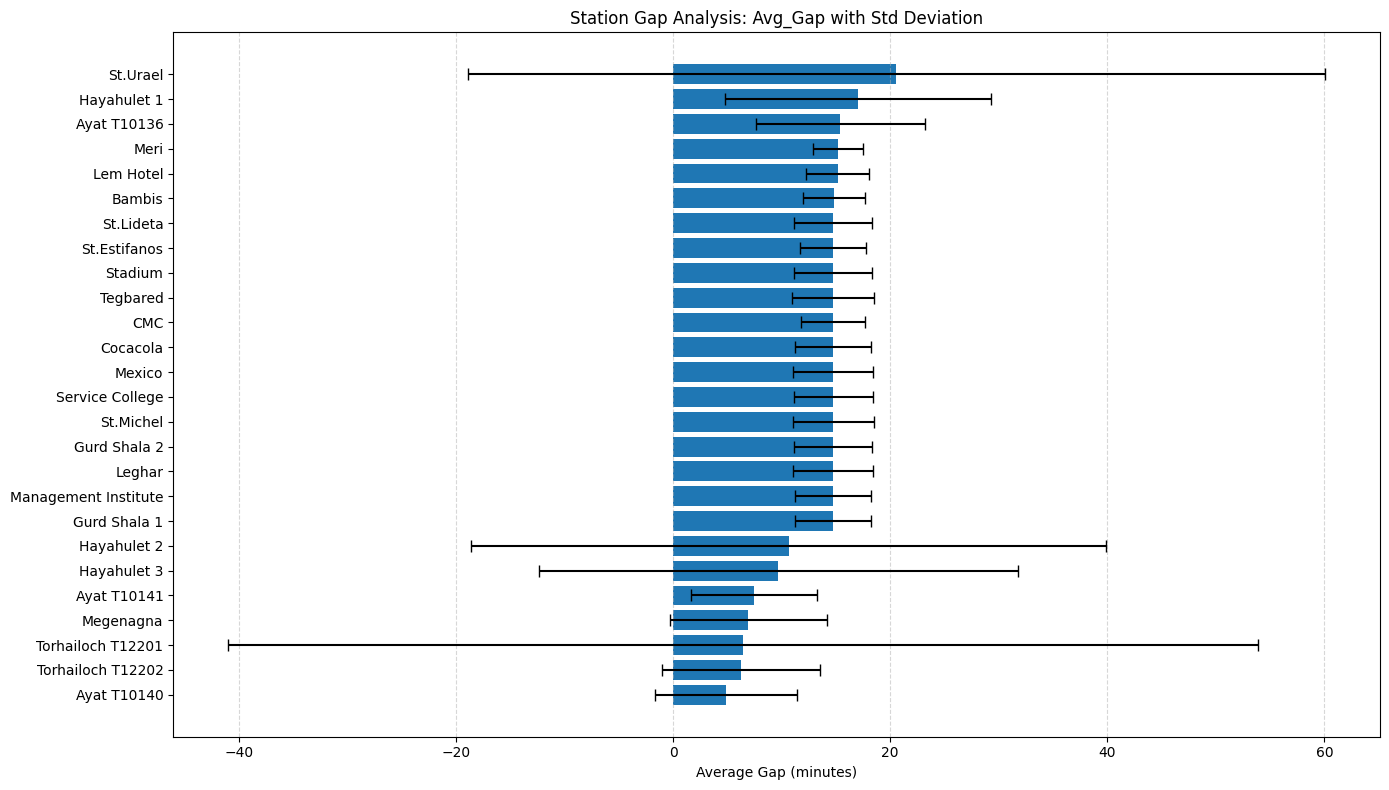

In [305]:
import importlib
import plot_utils  # This must succeed; make sure plot_utils.py is in the same directory or in PYTHONPATH

importlib.reload(plot_utils)

# Sort by Avg_Gap for better visualization
df_sorted = station_stats.sort_values("Avg_Gap")

plot_utils.plot_dwell_time_distribution(df_sorted)


In [306]:
# a new dataframe with the stations,station_id and the average dwell time
avg_dwell_time = df_pivot.groupby('station_id')['Dwell Time'].mean().reset_index()
avg_dwell_time = avg_dwell_time.rename(columns={'Dwell Time': 'Average Dwell Time'})
avg_dwell_time.head(50)

,station_id,Average Dwell Time
0,Depot,0 days 03:49:51.793388404
1,EW1,0 days 00:04:20.787878787
2,EW10,0 days 00:04:15.757575757
3,EW11,0 days 00:04:11.060606060
4,EW12,0 days 04:21:31.753443525
5,EW13,0 days 00:24:01.666666666
6,EW14,0 days 00:04:01.666666666
7,EW15,0 days 00:04:01.666666666
8,EW16,0 days 00:04:06.363636363
9,EW17,0 days 00:04:06.363636363


# Calculate and Display Average Dwell Time
A new DataFrame is created to show the average dwell time for each station. It's calculated by grouping df_pivot by 'station_id' and finding the mean of 'Dwell Time'.

In [307]:
print(df_pivot['Dwell Time'].dtype)
df_pivot.loc[df_pivot['Dwell Time'] > pd.Timedelta(minutes=10), 'Dwell Time'] = avg_dwell_time['Average Dwell Time']


timedelta64[ns]


# Visualize Data Statistics
This cell uses the plot_utils module to generate a series of plots that visualize the analyzed data, such as average arrival gaps and extreme dwell times.

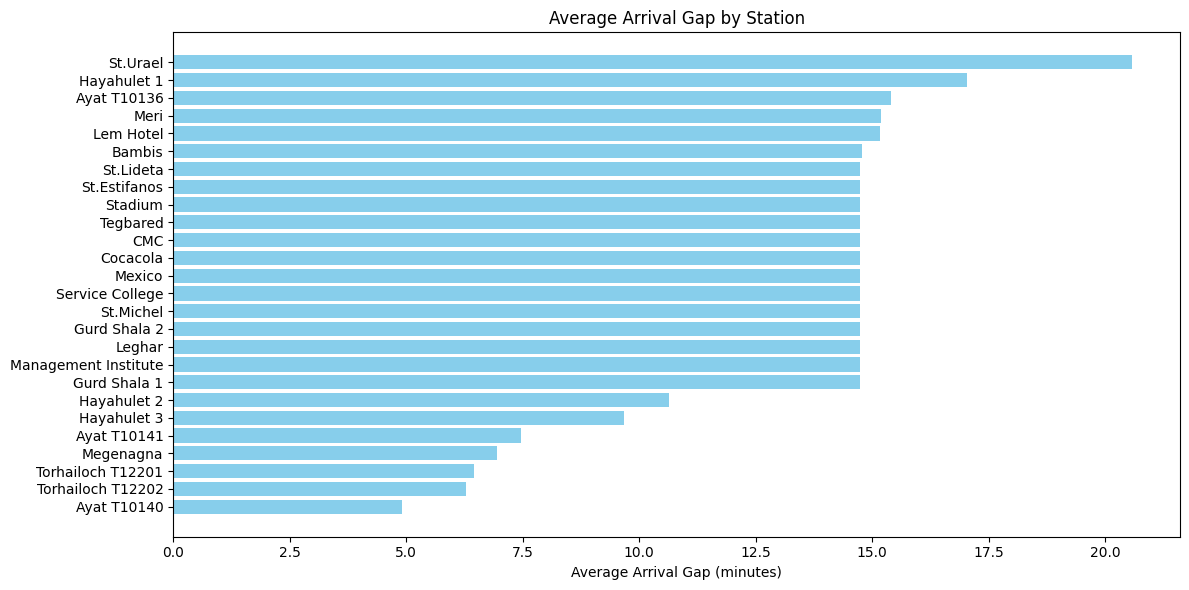

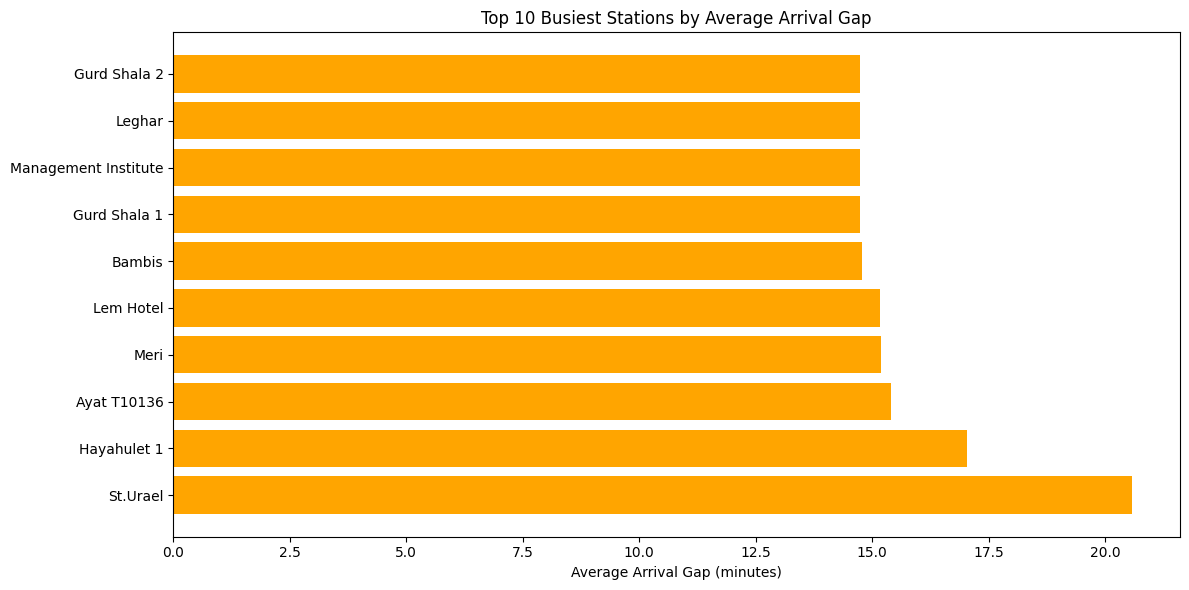

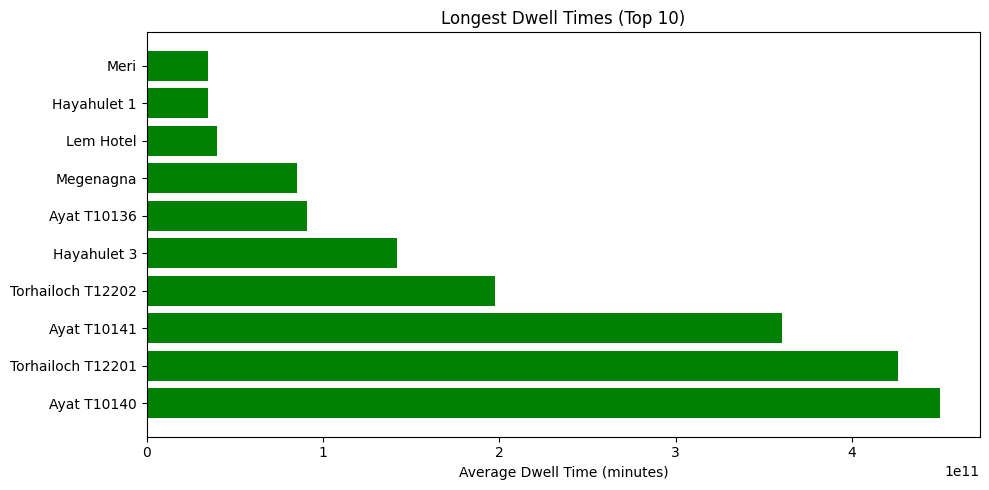

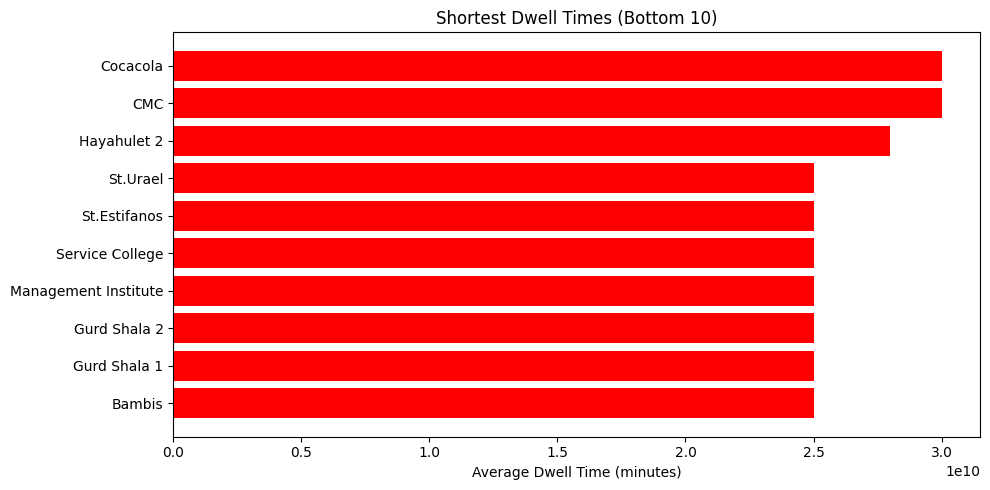

In [308]:
import importlib
import plot_utils  # This must succeed; make sure plot_utils.py is in the same directory or in PYTHONPATH

importlib.reload(plot_utils)

plot_utils.plot_avg_arrival_gap(station_stats)
plot_utils.plot_top_avg_gaps(station_stats)
plot_utils.plot_dwell_time_extremes(df_pivot)


In [309]:
df_pivot["Dwell Time"]

0      0 days 00:03:00
1      0 days 00:01:24
2      0 days 00:01:24
3      0 days 00:01:24
4      0 days 00:01:24
             ...      
1711               NaT
1712               NaT
1713               NaT
1714               NaT
1715               NaT
Name: Dwell Time, Length: 1716, dtype: timedelta64[ns]

In [310]:
print(df_pivot[df_pivot['Dwell Time'] > pd.Timedelta(minutes=10)][["station_id","Dwell Time"]])
print(df_pivot[df_pivot['Dwell Time'] < pd.Timedelta(minutes=0)][["station_id","Dwell Time"]])


Empty DataFrame
Columns: [station_id, Dwell Time]
Index: []
Empty DataFrame
Columns: [station_id, Dwell Time]
Index: []


# : Save Processed Data to CSV

In [311]:
#save df_privot as csv
df_pivot.to_csv('../data/processed/EW_time_table_processed.csv', index=False)

In [312]:
df_pivot.head()

arrival_departure,Stations,station_id,train_id,Arrival,Departure,Dwell Time
0,Ayat T10136,EW1,10102,2025-08-05 05:17:28,2025-08-05 05:20:28,0 days 00:03:00
1,Ayat T10136,EW1,10104,2025-08-05 07:00:36,2025-08-05 07:02:00,0 days 00:01:24
2,Ayat T10136,EW1,10106,2025-08-05 09:00:36,2025-08-05 09:02:00,0 days 00:01:24
3,Ayat T10136,EW1,10108,2025-08-05 11:00:36,2025-08-05 11:02:00,0 days 00:01:24
4,Ayat T10136,EW1,10110,2025-08-05 13:00:36,2025-08-05 13:02:00,0 days 00:01:24
